In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [8]:
# Load dataset
df = pd.read_excel("Hotel Online Reservations data.xlsx")

# Display first 5 rows
df.head()


,Reservation_id,Reservation_Date,Hotel_Name,City,Booking_Website,CheckIn_Date,CheckOut_Date,Rooms,Guests,Price_USD
0,26565,2025-12-13,Comfort inn,Los Angeles,Expedia,2026-01-01,2026-01-07,5,3,489.37
1,26566,2025-07-02,Comfort inn,Houston,Agoda,2025-07-09,2025-07-10,3,3,290.95
2,26567,2025-01-12,Comfort inn,Houston,Airbnb,2025-01-25,2025-01-28,5,2,272.67
3,26568,2025-04-26,Comfort inn,New York,Booking.com,2025-05-09,2025-05-13,4,6,109.01
4,26569,2025-11-14,Comfort inn,Miami,Airbnb,2025-11-16,2025-11-22,3,5,456.37


In [10]:
df.columns


Index(['Reservation_id', 'Reservation_Date', 'Hotel_Name', 'City',
       'Booking_Website', 'CheckIn_Date', 'CheckOut_Date', 'Rooms', 'Guests',
       'Price_USD'],
      dtype='object')

In [11]:
df['Revenue'] = df['Price_USD'] * df['Rooms']


In [12]:
city_revenue = (
    df.groupby('City')['Revenue']
    .sum()
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
)

city_revenue


,City,Revenue
3,Miami,20816582.40
4,New York,20340756.39
0,Chicago,20302083.22
1,Houston,20234459.20
2,Los Angeles,20148667.57


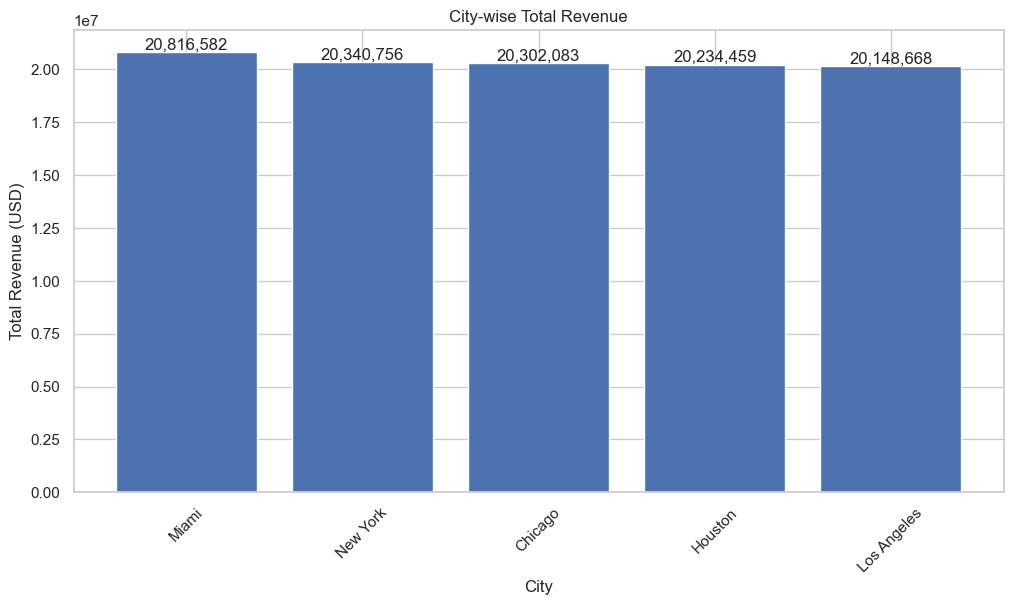

Highest Sales City: Miami with Revenue $20816582.40


In [16]:
# Revenue calculation
df['Revenue'] = df['Price_USD'] * df['Rooms']

# City-wise revenue
city_revenue = (
    df.groupby('City')['Revenue']
    .sum()
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(city_revenue['City'], city_revenue['Revenue'])

plt.title("City-wise Total Revenue")
plt.xlabel("City")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)

# Add revenue values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.show()


top_city = city_revenue.iloc[0]
print(f"Highest Sales City: {top_city['City']} with Revenue ${top_city['Revenue']:.2f}")



City with highest reservations: Miami (20291)


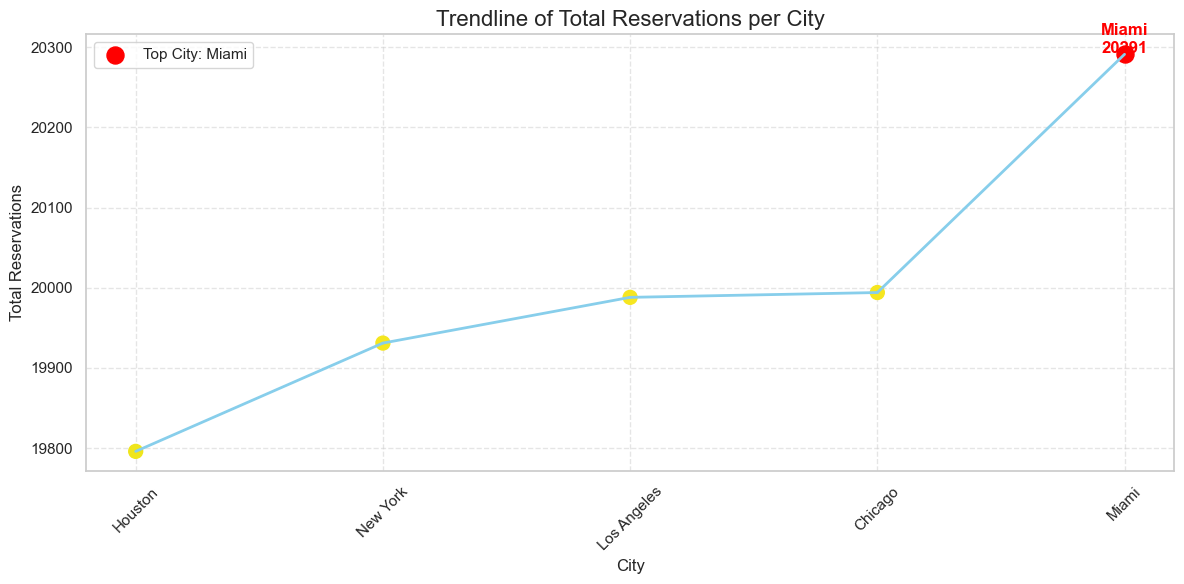

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Step 1: Load dataset
# -----------------------------
df = pd.read_excel("Hotel Online Reservations data.xlsx")

# -----------------------------
# Step 2: Calculate total reservations per city
# -----------------------------
city_total_reservations = df.groupby('City').size().reset_index(name='Total_Reservations')

# Sort cities by total reservations for better trend visualization
city_total_reservations = city_total_reservations.sort_values('Total_Reservations', ascending=True).reset_index(drop=True)

# Identify the top city
top_city = city_total_reservations.loc[city_total_reservations['Total_Reservations'].idxmax(), 'City']
top_value = city_total_reservations['Total_Reservations'].max()
top_index = city_total_reservations.index[city_total_reservations['City'] == top_city][0]
print(f"City with highest reservations: {top_city} ({top_value})")

# -----------------------------
# Step 3: Plot colorful trendline
# -----------------------------
plt.figure(figsize=(12,6))

# Use a colormap to color based on reservation count
colors = plt.cm.viridis(city_total_reservations['Total_Reservations'] / city_total_reservations['Total_Reservations'].max())

# Plot line with colored markers
for i in range(len(city_total_reservations)-1):
    plt.plot(
        [i, i+1],
        [city_total_reservations['Total_Reservations'][i], city_total_reservations['Total_Reservations'][i+1]],
        color='skyblue', linewidth=2
    )

plt.scatter(
    np.arange(len(city_total_reservations)),
    city_total_reservations['Total_Reservations'],
    color=colors,
    s=100
)

# Highlight the top city
plt.scatter(top_index, top_value, color='red', s=150, label=f"Top City: {top_city}")
plt.text(top_index, top_value + 2, f"{top_city}\n{top_value}", ha='center', color='red', fontsize=12, fontweight='bold')

plt.title('Trendline of Total Reservations per City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Reservations', fontsize=12)
plt.xticks(np.arange(len(city_total_reservations)), city_total_reservations['City'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()


Month with highest reservations: Dec-2025 (8619 reservations)


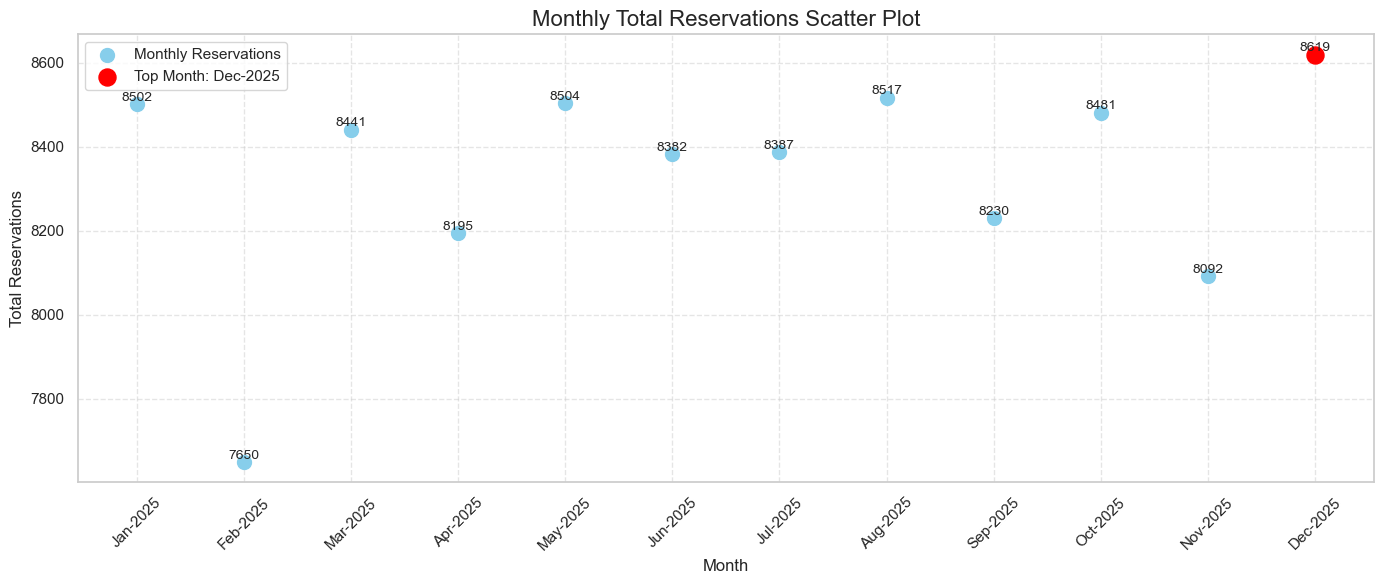

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load dataset
# -----------------------------
df = pd.read_excel("Hotel Online Reservations data.xlsx")

# Convert Reservation_Date to datetime
df['Reservation_Date'] = pd.to_datetime(df['Reservation_Date'])

# -----------------------------
# Step 2: Extract month name and year
# -----------------------------
df['Month'] = df['Reservation_Date'].dt.strftime('%b')  # Month abbreviation (Jan, Feb, etc.)
df['YearMonth'] = df['Reservation_Date'].dt.to_period('M')  # YYYY-MM format for grouping

# Group by YearMonth to count reservations
monthly_reservations = df.groupby('YearMonth').size().reset_index(name='Total_Reservations')

# Add month names for plotting
monthly_reservations['MonthName'] = monthly_reservations['YearMonth'].dt.strftime('%b-%Y')

# Find the month with highest reservations
top_month = monthly_reservations.loc[monthly_reservations['Total_Reservations'].idxmax()]
print(f"Month with highest reservations: {top_month['MonthName']} ({top_month['Total_Reservations']} reservations)")

# -----------------------------
# Step 3: Plot scatter plot
# -----------------------------
plt.figure(figsize=(14,6))

# Scatter points for all months
plt.scatter(monthly_reservations['MonthName'], monthly_reservations['Total_Reservations'], color='skyblue', s=100, label='Monthly Reservations')

# Highlight the top month in red
plt.scatter(top_month['MonthName'], top_month['Total_Reservations'], color='red', s=150, label=f"Top Month: {top_month['MonthName']}")

# Annotate each point with reservation number
for i, row in monthly_reservations.iterrows():
    plt.text(row['MonthName'], row['Total_Reservations'] + 1, int(row['Total_Reservations']), ha='center', va='bottom', fontsize=10)

plt.title('Monthly Total Reservations Scatter Plot', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Reservations', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Website with highest reservations: Hotels.com (20143 reservations)


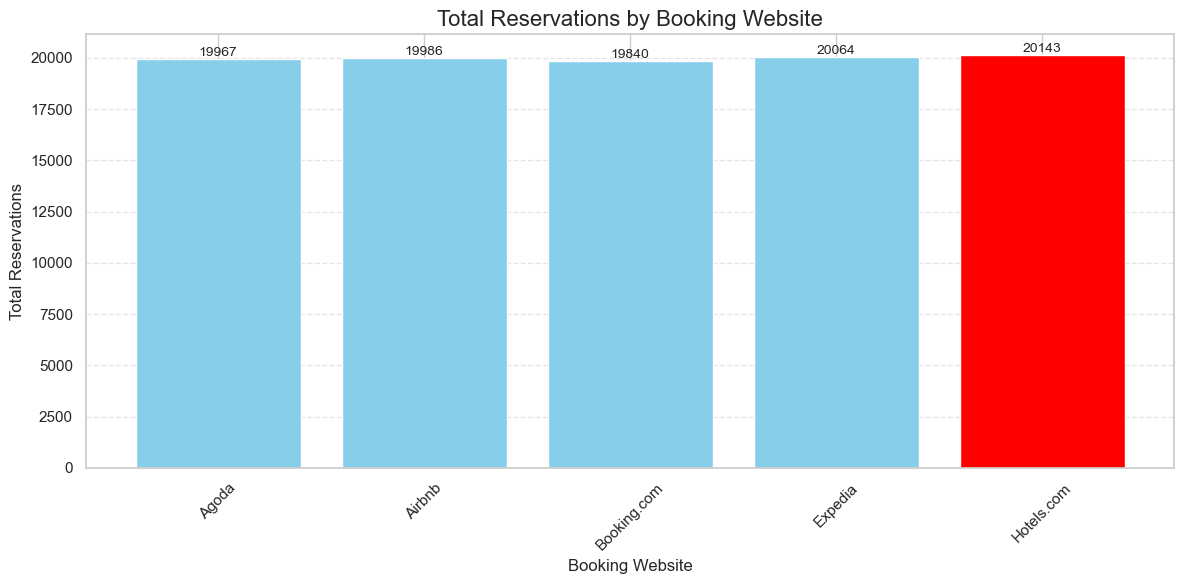

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load dataset
# -----------------------------
df = pd.read_excel("Hotel Online Reservations data.xlsx")

# -----------------------------
# Step 2: Group by Booking_Website
# -----------------------------
website_reservations = df.groupby('Booking_Website').size().reset_index(name='Total_Reservations')

# Find the website with the highest reservations
top_website = website_reservations.loc[website_reservations['Total_Reservations'].idxmax()]
print(f"Website with highest reservations: {top_website['Booking_Website']} ({top_website['Total_Reservations']} reservations)")

# -----------------------------
# Step 3: Plot bar chart
# -----------------------------
plt.figure(figsize=(12,6))

# Color: red for top website, blue for others
colors = ['red' if website == top_website['Booking_Website'] else 'skyblue' for website in website_reservations['Booking_Website']]

plt.bar(website_reservations['Booking_Website'], website_reservations['Total_Reservations'], color=colors)

# Annotate each bar with the reservation number
for i, row in website_reservations.iterrows():
    plt.text(i, row['Total_Reservations'] + 2, int(row['Total_Reservations']), ha='center', va='bottom', fontsize=10)

plt.title('Total Reservations by Booking Website', fontsize=16)
plt.xlabel('Booking Website', fontsize=12)
plt.ylabel('Total Reservations', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
